
Intervalo 1: 2010 - 2013
Quantidade de propostas: 635
Média da taxa de juros mensal: 0.02
Média do valor da proposta: 87638.69
Média do valor do financiamento: 129706.15
Média do valor da entrada: 42067.47
Média do valor da prestação: 5019.50
Média da quantidade de parcelas: 60.49
Média da carência: 3.16


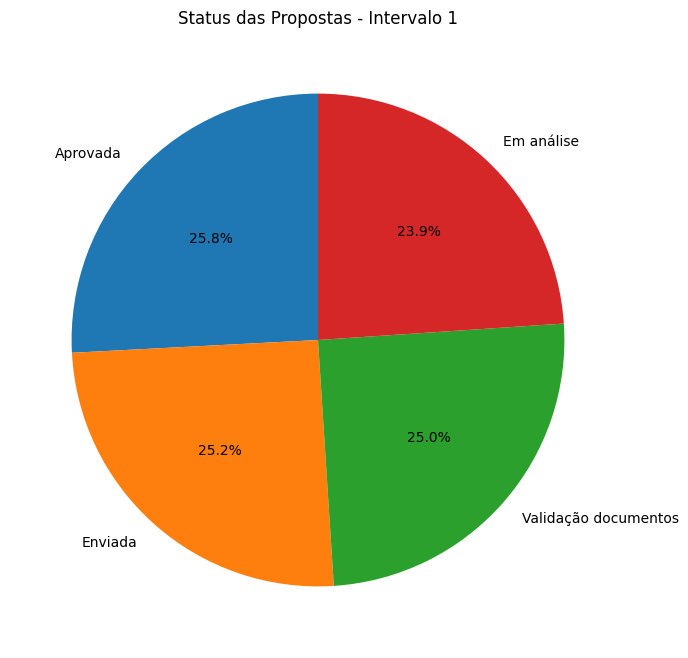


Intervalo 2: 2014 - 2017
Quantidade de propostas: 620
Média da taxa de juros mensal: 0.02
Média do valor da proposta: 81079.25
Média do valor do financiamento: 120939.58
Média do valor da entrada: 39860.33
Média do valor da prestação: 4655.83
Média da quantidade de parcelas: 61.59
Média da carência: 3.01


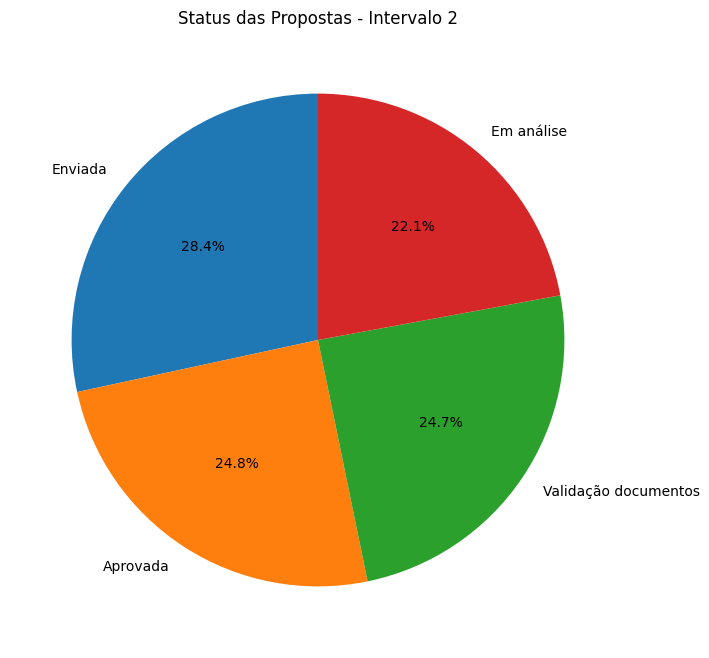


Intervalo 3: 2018 - 2021
Quantidade de propostas: 590
Média da taxa de juros mensal: 0.02
Média do valor da proposta: 81790.59
Média do valor do financiamento: 121812.44
Média do valor da entrada: 40021.85
Média do valor da prestação: 5217.61
Média da quantidade de parcelas: 61.62
Média da carência: 2.94


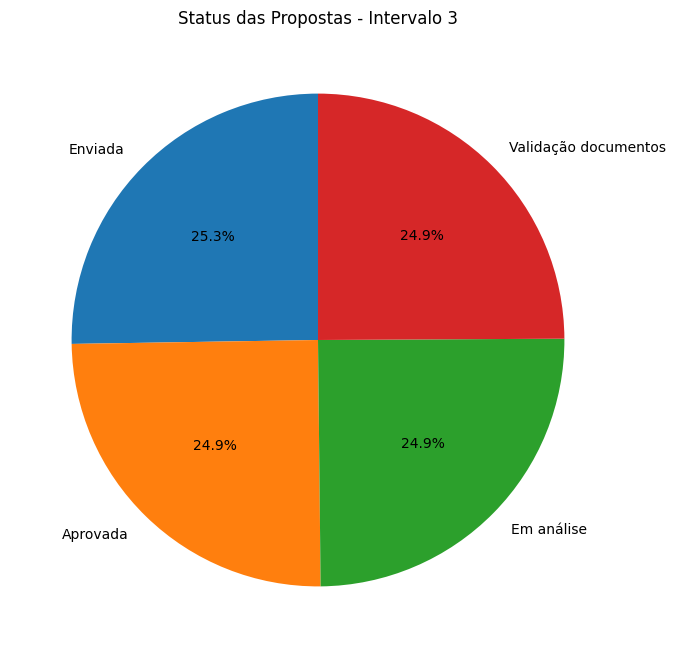


Intervalo 4: 2022 - 2022
Quantidade de propostas: 155
Média da taxa de juros mensal: 0.02
Média do valor da proposta: 87773.10
Média do valor do financiamento: 130976.93
Média do valor da entrada: 43203.82
Média do valor da prestação: 3943.79
Média da quantidade de parcelas: 61.31
Média da carência: 3.13


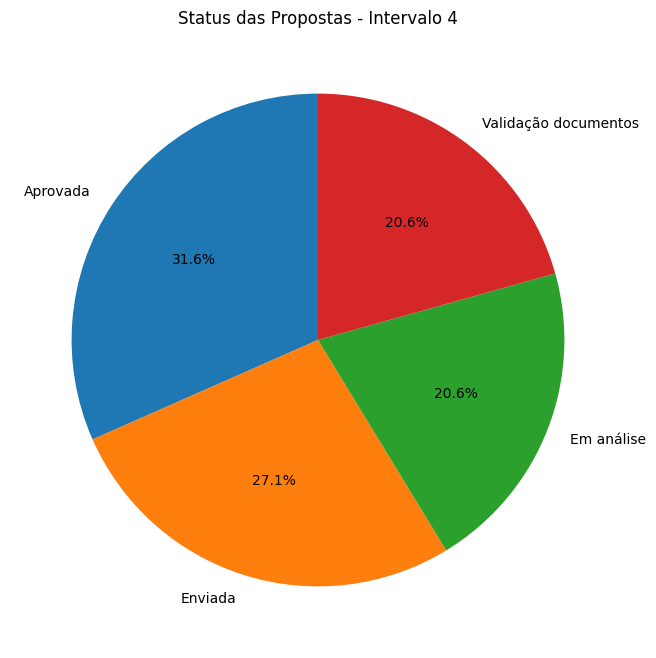

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo propostas_credito.csv
propostas = pd.read_csv('propostas_credito.csv', parse_dates=['data_entrada_proposta'])

# Convertendo os campos para float
propostas['taxa_juros_mensal'] = propostas['taxa_juros_mensal'].astype(float)
propostas['valor_financiamento'] = propostas['valor_financiamento'].astype(float)
propostas['valor_entrada'] = propostas['valor_entrada'].astype(float)
propostas['valor_prestacao'] = propostas['valor_prestacao'].astype(float)

# Criando a coluna 'ano_proposta'
propostas['ano_proposta'] = propostas['data_entrada_proposta'].dt.year

# Definindo os intervalos de tempo
intervalos = {
    1: (2010, 2013),
    2: (2014, 2017),
    3: (2018, 2021),
    4: (2022, 2022)
}

# Analisando as propostas em cada intervalo
for i in range(1, 5):
    ano_inicio, ano_fim = intervalos[i]
    propostas_intervalo = propostas[(propostas['ano_proposta'] >= ano_inicio) & (propostas['ano_proposta'] <= ano_fim)]

    # Calculando as estatísticas
    qtd_propostas = len(propostas_intervalo)
    media_taxa_juros_mensal = propostas_intervalo['taxa_juros_mensal'].mean()
    media_valor_proposta = propostas_intervalo['valor_proposta'].mean()
    media_valor_financiamento = propostas_intervalo['valor_financiamento'].mean()
    media_valor_entrada = propostas_intervalo['valor_entrada'].mean()
    media_valor_prestacao = propostas_intervalo['valor_prestacao'].mean()
    media_quantidade_parcelas = propostas_intervalo['quantidade_parcelas'].mean()
    media_carencia = propostas_intervalo['carencia'].mean()

    # Imprimindo as estatísticas
    print(f"\nIntervalo {i}: {ano_inicio} - {ano_fim}")
    print(f"Quantidade de propostas: {qtd_propostas}")
    print(f"Média da taxa de juros mensal: {media_taxa_juros_mensal:.2f}")
    print(f"Média do valor da proposta: {media_valor_proposta:.2f}")
    print(f"Média do valor do financiamento: {media_valor_financiamento:.2f}")
    print(f"Média do valor da entrada: {media_valor_entrada:.2f}")
    print(f"Média do valor da prestação: {media_valor_prestacao:.2f}")
    print(f"Média da quantidade de parcelas: {media_quantidade_parcelas:.2f}")
    print(f"Média da carência: {media_carencia:.2f}")

    # Gráfico de pizza com a porcentagem de status das propostas
    status_contagem = propostas_intervalo['status_proposta'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(status_contagem.values, labels=status_contagem.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Status das Propostas - Intervalo {i}")
    plt.show()